<a href="https://colab.research.google.com/github/tahminehladi/NPL_sentiment_twitter_LSTM/blob/main/Twitter_sentiment_analysis_LSTM_depression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 7.8 MB/s eta 0:00:00


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from bs4 import BeautifulSoup
import string
import re
import emoji
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from keras.layers import LSTM, Dense, SimpleRNN, Embedding, Flatten, Dropout
from keras.activations import softmax

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
from google.colab import drive
drive.mount('/content/Mydrive')

Mounted at /content/Mydrive


In [7]:
df=pd.read_csv('/content/Mydrive/MyDrive/TensorFlow_data/sentiment_tweets3.csv')
df

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...,...
10309,802309,No Depression by G Herbo is my mood from now o...,1
10310,802310,What do you do when depression succumbs the br...,1
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,802312,dont mistake a bad day with depression! everyo...,1


In [8]:
df.head()

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [9]:
df.columns=['Index', 'text', 'label']
df.head()

,Index,text,label
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [10]:
df['text']=df['text'].str.lower()
df.head()

,Index,text,label
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat need to send 'em to my accountant tomo...,0
4,540,add me on myspace!!! myspace.com/lookthunder,0


In [13]:
df[df['text']=='html']

,Index,text,label


In [14]:
# Remove HTML tags from text
def remove_html_tags(text):
  soup=BeautifulSoup(text, 'html.parser')
  return soup.get_text()

df['text_remove_html']=df['text'].apply(remove_html_tags)
df.head()

<ipython-input-14-ce4cb53cc4b9>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup=BeautifulSoup(text, 'html.parser')


,Index,text,label,text_remove_html
0,106,just had a real good moment. i missssssssss hi...,0,just had a real good moment. i missssssssss hi...
1,217,is reading manga http://plurk.com/p/mzp1e,0,is reading manga http://plurk.com/p/mzp1e
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,@comeagainjen http://twitpic.com/2y2lx - http:...
3,288,@lapcat need to send 'em to my accountant tomo...,0,@lapcat need to send 'em to my accountant tomo...
4,540,add me on myspace!!! myspace.com/lookthunder,0,add me on myspace!!! myspace.com/lookthunder


In [15]:
df[df['text'] != df['text_remove_html']]

,Index,text,label,text_remove_html
17,1919,@shipovalov &quot;nokla connecting people&quot...,0,"@shipovalov ""nokla connecting people"" ?? ?????..."
39,4111,bought the mh bundle? create a task called &qu...,0,"bought the mh bundle? create a task called ""ma..."
63,6496,@nicharry tell her simon &quot;who used to be ...,0,"@nicharry tell her simon ""who used to be from ..."
112,12141,"came back from seeing 17 againn,, was gooddd ...",0,"came back from seeing 17 againn,, was gooddd <3"
135,14714,"okay, have torn apart my work. fresh coffee &a...",0,"okay, have torn apart my work. fresh coffee & ..."
...,...,...,...,...
10292,802292,@mikestuchbery_ https://m.youtube.com/watch?f...,1,@mikestuchbery_ https://m.youtube.com/watch?f...
10295,802295,i love lauren so much <emoji: loudly crying fa...,1,i love lauren so much she has helped me threw...
10301,802301,"i'm suffering from depression, i'm thankful th...",1,"i'm suffering from depression, i'm thankful th..."
10303,802303,im going to see @hayleykiyoko next week in chi...,1,im going to see @hayleykiyoko next week in chi...


In [21]:
# remove RULs

def remove_urls(text):
  return re.sub(r'http\S+|www\S+', '', text)


df['text_remove_urls']=df['text_remove_html'].apply(remove_urls)
df.head()

,Index,text,label,text_remove_html,text_remove_urls
0,106,just had a real good moment. i missssssssss hi...,0,just had a real good moment. i missssssssss hi...,just had a real good moment. i missssssssss hi...
1,217,is reading manga http://plurk.com/p/mzp1e,0,is reading manga http://plurk.com/p/mzp1e,is reading manga
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,@comeagainjen http://twitpic.com/2y2lx - http:...,@comeagainjen -
3,288,@lapcat need to send 'em to my accountant tomo...,0,@lapcat need to send 'em to my accountant tomo...,@lapcat need to send 'em to my accountant tomo...
4,540,add me on myspace!!! myspace.com/lookthunder,0,add me on myspace!!! myspace.com/lookthunder,add me on myspace!!! myspace.com/lookthunder


In [22]:
# remove punctuations (For example, '!"#$%&'()+,-./:;<=>?@[]^_{|}~.)
punctuation=string.punctuation

def remove_punctuation(text):
  return text.translate(str.maketrans('', '', punctuation))

df['text_remove_punc']=df['text_remove_urls'].apply(remove_punctuation)
df.head()

,Index,text,label,text_remove_html,text_remove_urls,text_remove_punc
0,106,just had a real good moment. i missssssssss hi...,0,just had a real good moment. i missssssssss hi...,just had a real good moment. i missssssssss hi...,just had a real good moment i missssssssss him...
1,217,is reading manga http://plurk.com/p/mzp1e,0,is reading manga http://plurk.com/p/mzp1e,is reading manga,is reading manga
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,@comeagainjen http://twitpic.com/2y2lx - http:...,@comeagainjen -,comeagainjen
3,288,@lapcat need to send 'em to my accountant tomo...,0,@lapcat need to send 'em to my accountant tomo...,@lapcat need to send 'em to my accountant tomo...,lapcat need to send em to my accountant tomorr...
4,540,add me on myspace!!! myspace.com/lookthunder,0,add me on myspace!!! myspace.com/lookthunder,add me on myspace!!! myspace.com/lookthunder,add me on myspace myspacecomlookthunder


In [24]:
# handeling chatwords

chat_words = {
    "AFAIK": "As Far As I Know",
    "AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "A3": "Anytime, Anywhere, Anyplace",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
    "BRT": "Be Right There",
    "BTW": "By The Way",
    "B4": "Before",
    "B4N": "Bye For Now",
    "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FWIW": "For What It's Worth",
    "FYI": "For Your Information",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GN": "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8": "Great!",
    "G9": "Genius",
    "IC": "I See",
    "ICQ": "I Seek you (also a chat program)",
    "ILU": "ILU: I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "KISS": "Keep It Simple, Stupid",
    "LDR": "Long Distance Relationship",
    "LMAO": "Laugh My A.. Off",
    "LOL": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R": "Later",
    "MTE": "My Thoughts Exactly",
    "M8": "Mate",
    "NRN": "No Reply Necessary",
    "OIC": "Oh I See",
    "PITA": "Pain In The A..",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "QPSA?": "Que Pasa?",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My A.. Off",
    "SK8": "Skate",
    "STATS": "Your sex and age",
    "ASL": "Age, Sex, Location",
    "THX": "Thank You",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
    "U": "You",
    "U2": "You Too",
    "U4E": "Yours For Ever",
    "WB": "Welcome Back",
    "WTF": "What The F...",
    "WTG": "Way To Go!",
    "WUF": "Where Are You From?",
    "W8": "Wait...",
    "7K": "Sick:-D Laugher",
    "TFW": "That feeling when",
    "MFW": "My face when",
    "MRW": "My reaction when",
    "IFYP": "I feel your pain",
    "TNTL": "Trying not to laugh",
    "JK": "Just kidding",
    "IDC": "I don't care",
    "ILY": "I love you",
    "IMU": "I miss you",
    "ADIH": "Another day in hell",
    "ZZZ": "Sleeping, bored, tired",
    "WYWH": "Wish you were here",
    "TIME": "Tears in my eyes",
    "BAE": "Before anyone else",
    "FIMH": "Forever in my heart",
    "BSAAW": "Big smile and a wink",
    "BWL": "Bursting with laughter",
    "BFF": "Best friends forever",
    "CSL": "Can't stop laughing"
}

def replace_chat_words(text):
  words=text.split()
  for i, word in enumerate(words):
    if word.lower() in chat_words:
      words[i]= chat_words[words.lower()]
  return ' '.join(words)

df['text_replace_chat_words']=df['text_remove_punc'].apply(replace_chat_words)
df.head()

,Index,text,label,text_remove_html,text_remove_urls,text_remove_punc,text_replace_chat_words
0,106,just had a real good moment. i missssssssss hi...,0,just had a real good moment. i missssssssss hi...,just had a real good moment. i missssssssss hi...,just had a real good moment i missssssssss him...,just had a real good moment i missssssssss him...
1,217,is reading manga http://plurk.com/p/mzp1e,0,is reading manga http://plurk.com/p/mzp1e,is reading manga,is reading manga,is reading manga
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,@comeagainjen http://twitpic.com/2y2lx - http:...,@comeagainjen -,comeagainjen,comeagainjen
3,288,@lapcat need to send 'em to my accountant tomo...,0,@lapcat need to send 'em to my accountant tomo...,@lapcat need to send 'em to my accountant tomo...,lapcat need to send em to my accountant tomorr...,lapcat need to send em to my accountant tomorr...
4,540,add me on myspace!!! myspace.com/lookthunder,0,add me on myspace!!! myspace.com/lookthunder,add me on myspace!!! myspace.com/lookthunder,add me on myspace myspacecomlookthunder,add me on myspace myspacecomlookthunder


In [28]:
# download NLTK stopwords corpus
nltk.download('stopwords')

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

df['text_remove_stopwords']=df['text_replace_chat_words'].apply(remove_stopwords)
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Index,text,label,text_remove_html,text_remove_urls,text_remove_punc,text_replace_chat_words,text_remove_stopwords
0,106,just had a real good moment. i missssssssss hi...,0,just had a real good moment. i missssssssss hi...,just had a real good moment. i missssssssss hi...,just had a real good moment i missssssssss him...,just had a real good moment i missssssssss him...,real good moment missssssssss much
1,217,is reading manga http://plurk.com/p/mzp1e,0,is reading manga http://plurk.com/p/mzp1e,is reading manga,is reading manga,is reading manga,reading manga
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,@comeagainjen http://twitpic.com/2y2lx - http:...,@comeagainjen -,comeagainjen,comeagainjen,comeagainjen
3,288,@lapcat need to send 'em to my accountant tomo...,0,@lapcat need to send 'em to my accountant tomo...,@lapcat need to send 'em to my accountant tomo...,lapcat need to send em to my accountant tomorr...,lapcat need to send em to my accountant tomorr...,lapcat need send em accountant tomorrow oddly ...
4,540,add me on myspace!!! myspace.com/lookthunder,0,add me on myspace!!! myspace.com/lookthunder,add me on myspace!!! myspace.com/lookthunder,add me on myspace myspacecomlookthunder,add me on myspace myspacecomlookthunder,add myspace myspacecomlookthunder


In [40]:
# remove emojis

def remove_emojis(text):
  return emoji.replace_emoji(text, replace='')

df['text_remove_emoji']=df['text_remove_stopwords'].apply(remove_emojis)
df.head()

,Index,text,label,text_remove_html,text_remove_urls,text_remove_punc,text_replace_chat_words,text_remove_stopwords,text_remove_emoji,cleaned_text,text_lemmatized
0,106,just had a real good moment. i missssssssss hi...,0,just had a real good moment. i missssssssss hi...,just had a real good moment. i missssssssss hi...,just had a real good moment i missssssssss him...,just had a real good moment i missssssssss him...,real good moment missssssssss much,real good moment missssssssss much,real good moment missssssssss much,real good moment missssssssss much
1,217,is reading manga http://plurk.com/p/mzp1e,0,is reading manga http://plurk.com/p/mzp1e,is reading manga,is reading manga,is reading manga,reading manga,reading manga,read manga,read manga
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,@comeagainjen http://twitpic.com/2y2lx - http:...,@comeagainjen -,comeagainjen,comeagainjen,comeagainjen,comeagainjen,comeagainjen,comeagainjen
3,288,@lapcat need to send 'em to my accountant tomo...,0,@lapcat need to send 'em to my accountant tomo...,@lapcat need to send 'em to my accountant tomo...,lapcat need to send em to my accountant tomorr...,lapcat need to send em to my accountant tomorr...,lapcat need send em accountant tomorrow oddly ...,lapcat need send em accountant tomorrow oddly ...,lapcat need send em account tomorrow oddli was...,lapcat need send em accountant tomorrow oddly ...
4,540,add me on myspace!!! myspace.com/lookthunder,0,add me on myspace!!! myspace.com/lookthunder,add me on myspace!!! myspace.com/lookthunder,add me on myspace myspacecomlookthunder,add me on myspace myspacecomlookthunder,add myspace myspacecomlookthunder,add myspace myspacecomlookthunder,add myspac myspacecomlookthund,add myspace myspacecomlookthunder


In [41]:
from nltk.stem.porter import PorterStemmer

ps=PorterStemmer()
def stem_words(text):
  return ' '.join([ps.stem(word) for word in text.split()])

df['cleaned_text']=df['text_remove_emoji'].apply(stem_words)
df.head()

,Index,text,label,text_remove_html,text_remove_urls,text_remove_punc,text_replace_chat_words,text_remove_stopwords,text_remove_emoji,cleaned_text,text_lemmatized
0,106,just had a real good moment. i missssssssss hi...,0,just had a real good moment. i missssssssss hi...,just had a real good moment. i missssssssss hi...,just had a real good moment i missssssssss him...,just had a real good moment i missssssssss him...,real good moment missssssssss much,real good moment missssssssss much,real good moment missssssssss much,real good moment missssssssss much
1,217,is reading manga http://plurk.com/p/mzp1e,0,is reading manga http://plurk.com/p/mzp1e,is reading manga,is reading manga,is reading manga,reading manga,reading manga,read manga,read manga
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,@comeagainjen http://twitpic.com/2y2lx - http:...,@comeagainjen -,comeagainjen,comeagainjen,comeagainjen,comeagainjen,comeagainjen,comeagainjen
3,288,@lapcat need to send 'em to my accountant tomo...,0,@lapcat need to send 'em to my accountant tomo...,@lapcat need to send 'em to my accountant tomo...,lapcat need to send em to my accountant tomorr...,lapcat need to send em to my accountant tomorr...,lapcat need send em accountant tomorrow oddly ...,lapcat need send em accountant tomorrow oddly ...,lapcat need send em account tomorrow oddli was...,lapcat need send em accountant tomorrow oddly ...
4,540,add me on myspace!!! myspace.com/lookthunder,0,add me on myspace!!! myspace.com/lookthunder,add me on myspace!!! myspace.com/lookthunder,add me on myspace myspacecomlookthunder,add me on myspace myspacecomlookthunder,add myspace myspacecomlookthunder,add myspace myspacecomlookthunder,add myspac myspacecomlookthund,add myspace myspacecomlookthunder


In [42]:
# Split data

X= df['cleaned_text']
y = df['label']

X_train, X_test, y_train, y_test= train_test_split( X, y, test_size=0.2, random_state=12)

In [44]:
# Tokenization and padding Sequences

tokenizer= Tokenizer(oov_token='nothing') #oov_token = 'nothing', which will be used to represent out-of-vocabulary words during tokenization.
tokenizer.fit_on_texts(X_train) #  to build the vocabulary based on the words present in X_train.
tokenizer.fit_on_texts(X_test)

In [45]:
tokenizer.document_count #  returns the total number of documents (sentences) processed by the tokenizer.

10314

In [47]:
# texts_to_sequences() method is used to convert each text in X_train and X_test
# to sequences of integers based on the tokenizer's vocabulary.
X_train_sequences= tokenizer.texts_to_sequences(X_train)
X_test_sequences=tokenizer.texts_to_sequences(X_test)

In [48]:
# Max len in X_train sequences
maxlen= max(len(tokens) for tokens in X_train_sequences)

print('Maximum sequence length (maxlen):', maxlen)

Maximum sequence length (maxlen): 75


In [50]:
# perform padding on X_train and X_test sequences
# to ensure all sequences have the same length (maxlen) by padding shorter sequences with zeros at the end (post-padding).
X_train_padded= pad_sequences(X_train_sequences, maxlen=maxlen, padding='post')
X_test_padded= pad_sequences(X_test_sequences, maxlen=maxlen, padding='post')

In [51]:
X_train_padded

array([[ 1440,  1993,  5306, ...,     0,     0,     0],
       [ 5307,    58,   777, ...,     0,     0,     0],
       [ 3530,  5309,   501, ...,     0,     0,     0],
       ...,
       [16219,   932,    26, ...,     0,     0,     0],
       [   53,     0,     0, ...,     0,     0,     0],
       [  143,   396,   404, ...,     0,     0,     0]], dtype=int32)

In [52]:
X_test_padded

array([[ 4851,    32,   216, ...,     0,     0,     0],
       [16221,  1406,  4854, ...,     0,     0,     0],
       [  543,  2063,    79, ...,     0,     0,     0],
       ...,
       [  472,   686,   344, ...,     0,     0,     0],
       [18905,   291,  4858, ...,     0,     0,     0],
       [ 2646,  1808,     0, ...,     0,     0,     0]], dtype=int32)

X_train_padded is assumed to be a numpy array containing sequences of integer-encoded tokens, where each token represents a word in the training dataset. These sequences are padded to have the same length.

In [53]:
# Modelling
input_size=np.max(X_train_padded) +1
input_size

16221

- np.max(X_train_padded) calculates the maximum integer value present in the X_train_padded array. Since these integers represent the token indices, the maximum value corresponds to the highest index used in the vocabulary.

- Adding 1 to np.max(X_train_padded) is necessary because indexing in Python starts from 0. So, if the maximum index in the vocabulary is, for example, 999, then the actual vocabulary size is 1000 (0 to 999 inclusive).

In [54]:
model=Sequential()

model.add(LSTM(256, input_shape=(75, 1), return_sequences=True))
model.add(LSTM(128))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.01))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history_1= model.fit(X_train_padded, y_train, epochs=10, batch_size=32, validation_data=(X_test_padded, y_test))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 119s 440ms/step - accuracy: 0.7942 - loss: 0.5013 - val_accuracy: 0.8100 - val_loss: 0.4696
Epoch 2/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 140s 434ms/step - accuracy: 0.8264 - loss: 0.4389 - val_accuracy: 0.8662 - val_loss: 0.3460
Epoch 3/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 111s 432ms/step - accuracy: 0.8849 - loss: 0.3125 - val_accuracy: 0.9074 - val_loss: 0.2500
Epoch 4/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 143s 436ms/step - accuracy: 0.9448 - loss: 0.1692 - val_accuracy: 0.9476 - val_loss: 0.1533
Epoch 5/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 143s 438ms/step - accuracy: 0.9651 - loss: 0.1068 - val_accuracy: 0.9748 - val_loss: 0.0847
Epoch 6/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 142s 441ms/step - accuracy: 0.9731 - loss: 0.0887 - val_accuracy: 0.9782 - val_loss: 0.0787
Epoch 7/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 142s 441ms/step - accuracy: 0.9686 - loss: 0.1116 - val_accuracy: 0.9806 - val_loss: 0.0754
Epoch 8/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 139s 432ms/step - accuracy: 0.9683 -

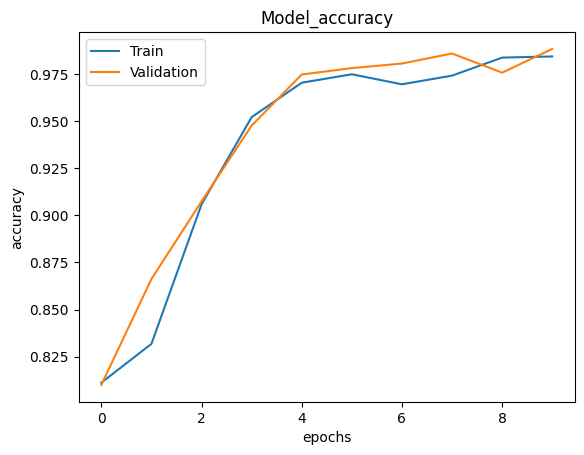

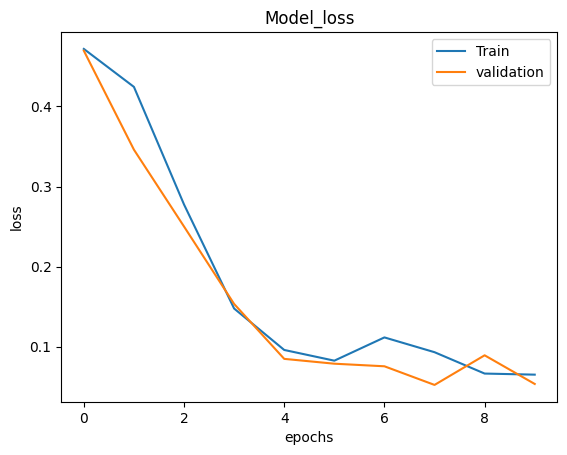

In [55]:
# plotting accuracy
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['Train', 'Validation'])
plt.show()



# plotting loss
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('Model_loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Train', 'validation'])
plt.show()

In [58]:
from sklearn.metrics import accuracy_score

y_pred_train_model_1= model.predict(X_train_padded)
y_pred_test_model_1=model.predict(X_test_padded)

# Convert probabilities to binary labels (threshold = 0.5)
# This converts probabilities into binary labels (0 or 1).
#If the predicted value is greater than or equal to 0.5, it's classified as 1; otherwise, it's classified as 0.
y_pred_train_binary = np.where(y_pred_train_model_1 >= 0.5, 1, 0)
y_pred_test_binary = np.where(y_pred_test_model_1 >= 0.5, 1, 0)

# Calculate accuracy
model_1_train_accuracy = accuracy_score(y_train, y_pred_train_binary)
model_1_test_accuracy = accuracy_score(y_test, y_pred_test_binary)

# Print results
print('Training accuracy:', model_1_train_accuracy)
print('Validation accuracy:', model_1_test_accuracy)

258/258 ━━━━━━━━━━━━━━━━━━━━ 37s 144ms/step
65/65 ━━━━━━━━━━━━━━━━━━━━ 7s 108ms/step
Training accuracy: 0.9869106774936371
Validation accuracy: 0.9883664566165778


In [59]:
y_pred_train_binary

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [60]:
y_train

,label
2119,0
1961,0
8607,1
9252,1
921,0
...,...
3714,0
7409,0
3325,0
9606,1


In [61]:
y_pred_train_model_1

array([[0.00918995],
       [0.0095932 ],
       [0.99164593],
       ...,
       [0.00973262],
       [0.00898783],
       [0.00905319]], dtype=float32)